In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import stats
import math as m
import random

In [2]:
esample = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/e_sample_for_Nz_imag_Mrest_imagerr_included.npy')
nsample = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/n_sample_for_Nz_imag_Mrest_imagerr_included.npy')

In [3]:
sz_e = esample[:,0]
pz_e = esample[:,1]
imag_e = esample[:,2]
Mrest_e = esample[:,3]
imagerr_e = esample[:,4]

In [4]:
sz_n = nsample[:,0]
pz_n = nsample[:,1]
imag_n = nsample[:,2]
Mrest_n = nsample[:,3]
imagerr_n = nsample[:,4]

In [5]:
print(esample.shape)
print(nsample.shape)

(79006336, 5)
(203682075, 5)


Text(0, 0.5, 'N(imagerr)')

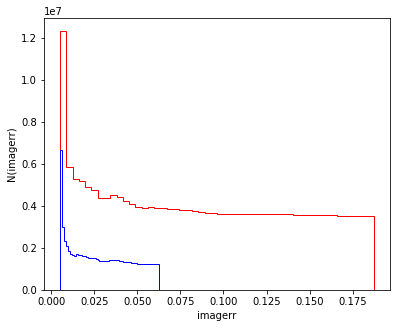

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6.2,5))
ax.hist(imagerr_n, bins=50, histtype='step', fill=False, edgecolor='red')
ax.hist(imagerr_e, bins=50, histtype='step', fill=False, edgecolor='blue')
#ax.set_xlim(26.0, 27.0)
ax.set_xlabel('imagerr')
ax.set_ylabel('N(imagerr)')
#plt.savefig('both_samples_unbinned.pdf')

In [7]:
def compute_SN(imagerr):
    return 1./(10.**(.4*imagerr)-1.)

In [ ]:
SN_n = compute_SN(imagerr_n)

In [ ]:
SN_e = compute_SN(imagerr_e)

Text(0, 0.5, 'N(SN)')

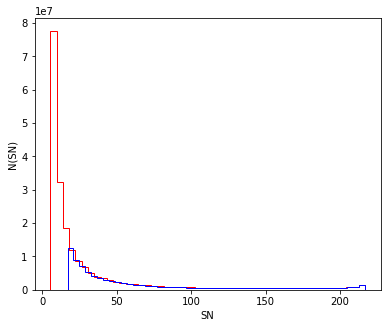

In [10]:
fig, ax = plt.subplots(1,1, figsize=(6.2,5))
ax.hist(SN_n, bins=50, histtype='step', fill=False, edgecolor='red')
ax.hist(SN_e, bins=50, histtype='step', fill=False, edgecolor='blue')
#ax.set_xlim(26.0, 27.0)
ax.set_xlabel('SN')
ax.set_ylabel('N(SN)')
#plt.savefig('both_samples_unbinned.pdf')

In [11]:
n_bin_edges = np.loadtxt('n_tomo_bin_edges.txt')

In [12]:
e_bin_edges = np.loadtxt('e_tomo_bin_edges.txt')

In [23]:
def generate_SN_sample(SN, pz, bin_edges, sample):
    fig, ax = plt.subplots(1,2, figsize=(12.4,5))
    for i in np.arange(10):
        tomo_bin = SN[(pz>=bin_edges[i]) & (pz<bin_edges[i+1])]
        tomo_bin_10 = random.sample(list(tomo_bin), int(len(tomo_bin)*0.01))
        np.savetxt('SN_' + sample+ '/' + sample + '_SN_bin_' + str(i) + '.txt', tomo_bin_10)
        print(len(tomo_bin_10)/len(tomo_bin))
        print(len(tomo_bin_10))
        ax[0].hist(tomo_bin, bins=50, histtype='step', fill=False, label='bin '+str(i))
        ax[1].hist(tomo_bin_10, bins=50, histtype='step', fill=False, label='bin '+str(i))

    ax[0].set_xlabel('SN full bin')
    ax[1].set_xlabel('SN 10% sample')
    plt.legend()

0.00999995468514252
203023
0.00999999138102234
197239
0.009999967654987044
207141
0.009999993411287265
197307
0.009999971888441301
202763
0.009999998593767776
213336
0.009999997979267691
197948
0.009999954778465546
196808
0.009999976682155267
210139
0.009999955676517978
207564


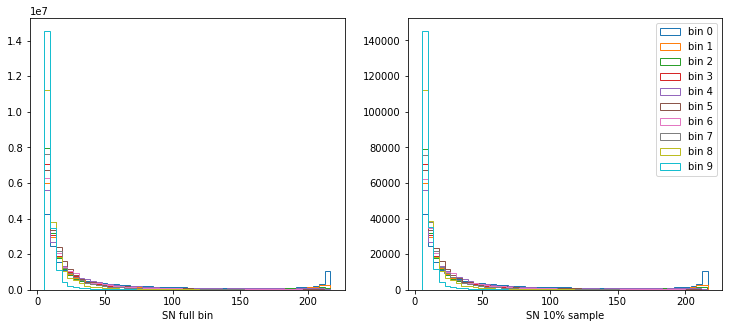

In [29]:
generate_SN_sample(SN_n, pz_n, n_bin_edges, 'n')

0.009999996112833054
77177
0.009999941294993311
76654
0.009999966085386338
82560
0.009999993465594065
76518
0.009999968034880338
78210
0.009999967250803174
79391
0.009999890616210505
81364
0.009999976717468289
77311
0.009999962077798985
81746
0.009999963199506011
78803


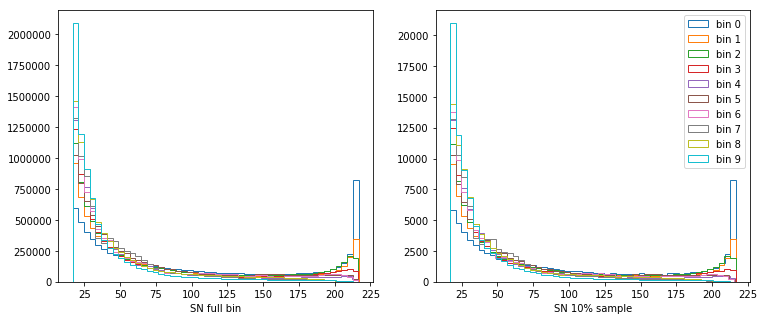

In [25]:
generate_SN_sample(SN_e, pz_e, e_bin_edges, 'e')